In [3]:
#NAME: Christian Dominic Angus
#ID: 6197873

#CERTIFICATION: I understand FIU's academic policies, and I certify that this work is my
#                  own and that none of it is the work of any other person.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the COP4612_HW1.csv data into a dataframe and show the first 10 entries of the data frame.

data = pd.read_csv('COP4612_HW1.csv')
data[0:10]

salary sex pay_grade          position  age  year_at_company
0   51945.03   M      GS10  FinancialAnalyst   49               19
1  120282.27   M      GS15        Accountant   20                0
2   73131.81   F      GS11  FinancialAnalyst   40               16
3   69548.85   M      GS11         Developer   32                4
4  114453.95   M      GS13        Accountant   57               21
5  100371.59   F      GS10         Secretary   64               40
6  108991.56   M      GS13         Developer   35               10
7   83882.52   M      GS11         Developer   37               12
8   76271.75   M      GS11         Developer   33                5
9  152449.05   M      GS15        Accountant   56               14

In [4]:
# 2. Print out the features (columns) name of the dataframe.

print(data.columns)

Index(['salary', 'sex', 'pay_grade', 'position', 'age', 'year_at_company'], dtype='object')


In [5]:
# 3. Print out the features (columns) dtype information.

print("--------------------")
print("Feature Info")
print("--------------------")
print(data.info())

--------------------
Feature Info
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   salary           3000 non-null   float64
 1   sex              3000 non-null   object 
 2   pay_grade        3000 non-null   object 
 3   position         3000 non-null   object 
 4   age              3000 non-null   int64  
 5   year_at_company  3000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 140.8+ KB
None


In [6]:
# 4. Print out the correlation of the features of the dataframe:

print(data.corr())

                   salary       age  year_at_company
salary           1.000000  0.052545         0.390425
age              0.052545  1.000000         0.665181
year_at_company  0.390425  0.665181         1.000000


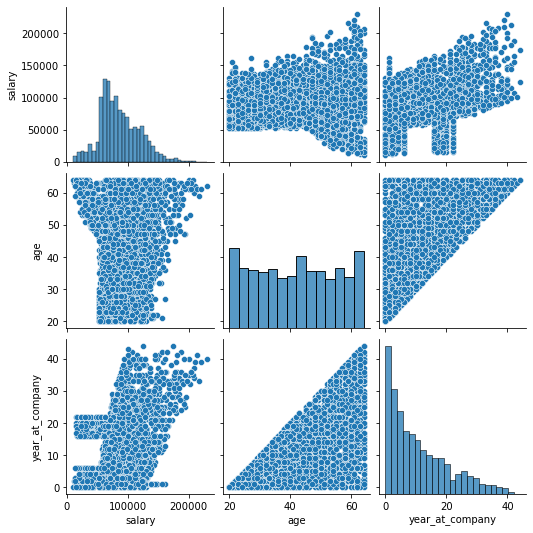

In [7]:
# 5. Show a pairwise plot of the feature of the dataframe. Here’s an example of what I’m looking for:

sns.pairplot(data)

In [8]:
# 6. Create dummy variables for features: sex, position, paygrade, then print out the column names 
# of the dataframe and show the first five entries of the dataframe.

new_data = pd.get_dummies(data)
print(new_data.columns)
pd.get_dummies(data[0:5])

Index(['salary', 'age', 'year_at_company', 'sex_F', 'sex_M', 'pay_grade_GS10',
       'pay_grade_GS11', 'pay_grade_GS12', 'pay_grade_GS13', 'pay_grade_GS14',
       'pay_grade_GS15', 'position_Accountant', 'position_Developer',
       'position_Engineer', 'position_FinancialAnalyst', 'position_Secretary'],
      dtype='object')


salary  age  year_at_company  sex_F  sex_M  pay_grade_GS10  \
0   51945.03   49               19      0      1               1   
1  120282.27   20                0      0      1               0   
2   73131.81   40               16      1      0               0   
3   69548.85   32                4      0      1               0   
4  114453.95   57               21      0      1               0   

   pay_grade_GS11  pay_grade_GS13  pay_grade_GS15  position_Accountant  \
0               0               0               0                    0   
1               0               0               1                    1   
2               1               0               0                    0   
3               1               0               0                    0   
4               0               1               0                    1   

   position_Developer  position_FinancialAnalyst  
0                   0                          1  
1                   0                          0  
2                   0                          1  
3                   1                          0  
4                   0                          0

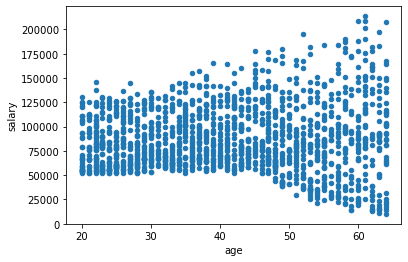

In [12]:
# 7. Plot the only women data with x-axis -> age and y-axis -> salary.

female_only = new_data.loc[(new_data.sex_F == 1)]
female_only.plot(x = 'age', y = 'salary', kind = 'scatter')
plt.show()

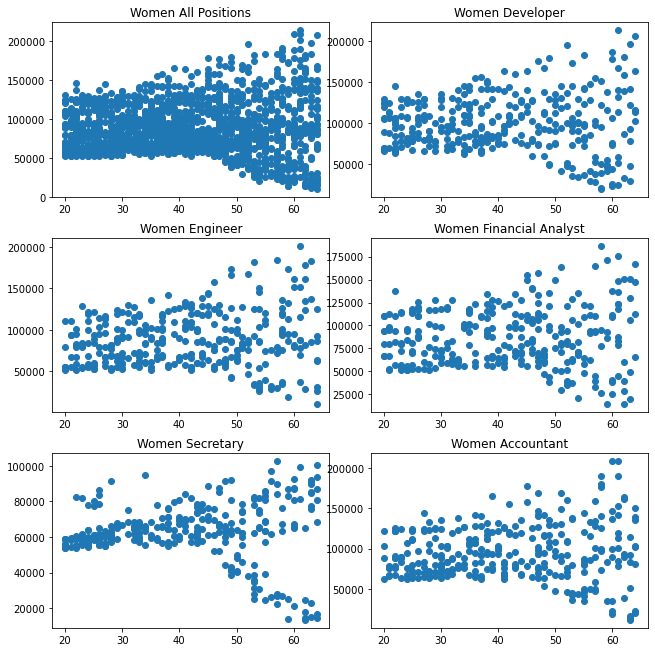

In [13]:
# 8. Subplot the only women data by position with x-axis -> age and y-axis -> salary. Write a 1-3 
# sentence comment about what you see in these graphs.

fig, ax = plt.subplots(3, 2, figsize = (9,9))
fig.tight_layout(h_pad = 2)

f_accountant = female_only[female_only['position_Accountant'] == 1]
f_developer = female_only[female_only['position_Developer'] == 1]
f_fa = female_only[female_only['position_FinancialAnalyst'] == 1]
f_engineer = female_only[female_only['position_Engineer'] == 1]
f_secretary = female_only[female_only['position_Secretary'] == 1]

ax[0][0].scatter(female_only['age'], female_only['salary'])
ax[0][0].set_title('Women All Positions')
ax[1][0].scatter(f_engineer['age'], f_engineer['salary'])
ax[1][0].set_title('Women Engineer')
ax[2][0].scatter(f_secretary['age'], f_secretary['salary'])
ax[2][0].set_title('Women Secretary')
ax[0][1].scatter(f_developer['age'], f_developer['salary'])
ax[0][1].set_title('Women Developer')
ax[1][1].scatter(f_fa['age'], f_fa['salary'])
ax[1][1].set_title('Women Financial Analyst')
ax[2][1].scatter(f_accountant['age'], f_accountant['salary'])
ax[2][1].set_title('Women Accountant')

plt.show()

In [ ]:
# With the given data, the first thing off the top of my head is how sporadic salary is when you
# reach the ~60 year old mark. You could either earn as low as $25,000 or as high as $200,000, which
# segues to my second though, how little variance salary is up until the 40 year mark. Salaries
# don't go beyond, at best, $100,000 of its lowest salary, which are the developer and financial
# accountant positions. At worst they'll have about a $50,000 buffer between it's lowest and highest
# which is the secretary position.

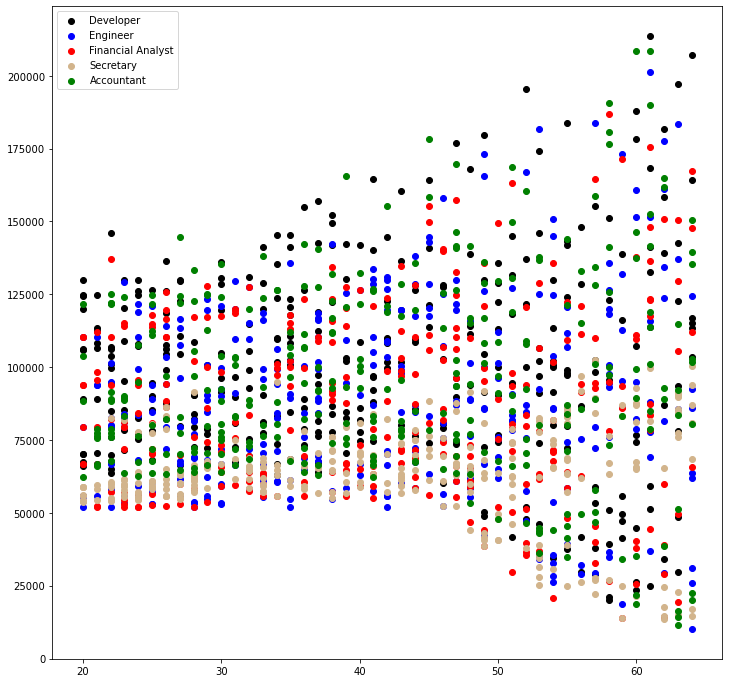

In [14]:
# 9. Plot the only women data by position with x-axis -> age and y-axis -> salary. Color code each position data. 

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)

plt.scatter(f_developer['age'], f_developer['salary'], color='black', label='Developer')
plt.scatter(f_engineer['age'], f_engineer['salary'], color='blue', label='Engineer')
plt.scatter(f_fa['age'], f_fa['salary'], color='red', label='Financial Analyst')
plt.scatter(f_secretary['age'], f_secretary['salary'], color='tan', label='Secretary')
plt.scatter(f_accountant['age'], f_accountant['salary'], color='green', label='Accountant')
plt.legend()

plt.show()

In [15]:
# 10. Create a dataframe that stores the following information shown below. This is only women data for each position.
# The “All” position is the aggregation of all positions together. Output the dataframe on the screen. 

data_female = {'Position': ['All', 'Developer', 'Engineer', 'Financial Analyst', 'Secretary', 'Accountant'],
               'Count':[female_only.count()[0], f_developer.count()[0], f_engineer.count()[0], 
                f_fa.count()[0], f_secretary.count()[0], f_accountant.count()[0]], 'Min Salary': [
                   round(female_only['salary'].min(), 2), round(f_developer['salary'].min(), 2), 
                   round(f_engineer['salary'].min(), 2), round(f_fa['salary'].min(), 2), 
                   round(f_secretary['salary'].min(), 2), round(f_accountant['salary'].min(), 2)],
              'Max Salary': [round(female_only['salary'].max(), 2), round(f_developer['salary'].max(), 2),
                round(f_engineer['salary'].max(), 2), round(f_fa['salary'].max(), 2), round(f_secretary['salary'].max(), 2), 
                round(f_accountant['salary'].max(), 2)], 'Mean Salary': [round(female_only['salary'].mean(), 2), 
                round(f_developer['salary'].mean(), 2), round(f_engineer['salary'].mean(), 2), round(f_fa['salary'].mean(), 2), 
                round(f_secretary['salary'].mean(), 2), round(f_accountant['salary'].mean(), 2)], 'Std Dev Salary':
               [female_only['salary'].std(), f_developer['salary'].std(), f_engineer['salary'].std(), f_fa['salary'].std(), 
               f_secretary['salary'].std(), f_accountant['salary'].std()], 'Age': [female_only['age'].mean(), f_developer['age'].mean(), 
                f_engineer['age'].mean(), f_fa['age'].mean(), f_secretary['age'].mean(), f_accountant['age'].mean()]
              }

female_stat = pd.DataFrame(data_female)
female_stat

Position  Count  Min Salary  Max Salary  Mean Salary  \
0                All   1533    10086.06   213617.05     87549.99   
1          Developer    326    20152.53   213617.05    100963.27   
2           Engineer    329    10086.06   201232.58     88267.18   
3  Financial Analyst    287    13991.54   186865.19     87178.33   
4          Secretary    291    13411.31   102608.67     63296.36   
5         Accountant    300    11410.88   208665.88     96069.27   

   Std Dev Salary        Age  
0    33495.553131  41.417482  
1    34717.443804  41.052147  
2    32627.254524  41.145897  
3    32097.677493  41.519164  
4    16671.174510  41.512027  
5    34256.235823  41.923333

In [16]:
# Function to remove outliers

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

Working on column: age
Working on column: salary


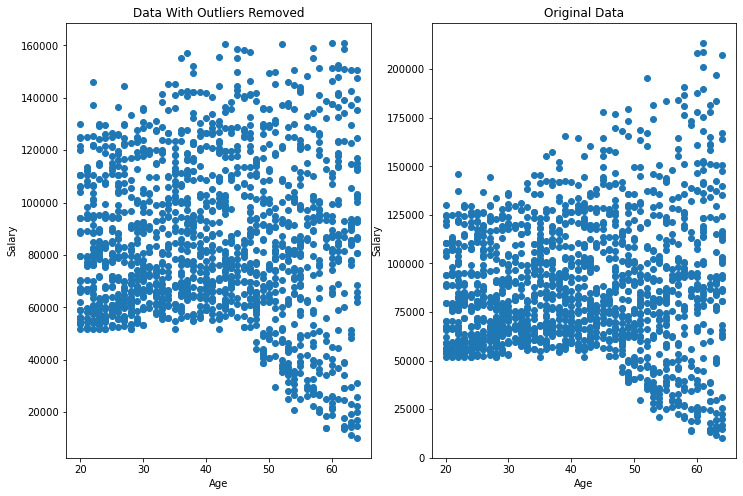

In [34]:
# 11. Remove all outliers for all the category position shown in step 10 (women data only).
# For each category set the outlier remove range to 2.2. After you have removed all the
# outliers plot the all position category data with outliers and without outliers.  

data3 = female_only.copy(deep=True)

columns = ['age', 'salary']

data3 = remove_outliers(data3, columns, 2.2)

fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].set_xlabel('Age')
ax[0].set_ylabel('Salary')
ax[0].set_title('Data With Outliers Removed')

ax[0].scatter(data3['age'], data3['salary'])

ax[1].set_xlabel('Age')
ax[1].set_ylabel('Salary')
ax[1].set_title('Original Data')

ax[1].scatter(female_only['age'], female_only['salary'])

plt.show()

In [19]:
# Function to run R-scores

def training_automation(data_source):
    
    
    
    report_df = pd.DataFrame(columns=['Train', 
                                      'Test', 
                                      'Test_R_Score', 
                                      'Test_RMSE',
                                      'Train_R_Score', 
                                      'Train_RMSE',
                                      'Model_Var',
                                      'Model_Error',
                                      'Avg_Salary'  ])
    # df
    
    model = LinearRegression()

    # getting the dependent and independent variables
    x_data = data_source[['age']]
    y_data = data_source['salary']
    
    sizes = np.arange(0.2, 1.0, 0.2)

    for  size in sizes:
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = size)


        # fit the model -> build the training model
        model.fit(x_train, y_train)


        predictions_test = model.predict(x_test) 


        # getting the error of the model
        error_test = y_test - predictions_test


        r2_test = r2_score(y_test, predictions_test)
        rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


        # getting the trainset info
        predictions_train = model.predict(x_train)
        r2_train = r2_score(y_train, predictions_train)
        rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

        # getting the error of the model
        error_train = y_train - predictions_train


        #normalizing by size
        model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)
        
        error_mean = error_test.mean()
        avg_salary = round(model.intercept_, 2)
        
        # appending new to report dataframe
        report_df.loc[len(report_df.index)] = {'Train': size, 
                                              'Test': 1- size, 
                                              'Test_R_Score': r2_test, 
                                              'Test_RMSE': rmse_test,
                                              'Train_R_Score': r2_train, 
                                              'Train_RMSE': rmse_train,
                                              'Model_Var': model_variance,
                                              'Model_Error': error_mean,
                                              'Avg_Salary':avg_salary}
        

    return report_df

In [27]:
# 12. Automation, for each category shown in step 10 (women data only) automate the model estimation with
# incremental train test size. Please note that the step size is 0.2 this is different than what was shown in the dataframe. 

print("Women Positions: All")
report_all = training_automation(female_only)
report_all

Women Positions: All


Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.030630  1.115819e+09       0.017702  1.233318e+09   
1    0.4   0.6      0.001638  1.163436e+09       0.000371  1.053794e+09   
2    0.6   0.4     -0.007246  1.113866e+09       0.008734  1.121601e+09   
3    0.8   0.2      0.003276  1.189371e+09       0.002918  1.099393e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.225629 -4914.030802    77021.45  
1   0.735630  1142.325304    84871.00  
2   1.486421   -81.517448    77724.96  
3   4.320326  1585.363204    81543.27

In [28]:
print("Women Positions: Developer")
report_developer = training_automation(f_developer)
report_developer

Women Positions: Developer


Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.034602  1.190736e+09       0.000777  1.370320e+09   
1    0.4   0.6     -0.006849  1.074757e+09       0.000733  1.401622e+09   
2    0.6   0.4     -0.112701  1.325180e+09       0.027084  1.166702e+09   
3    0.8   0.2     -0.065655  1.652038e+09       0.000700  1.091794e+09   

   Model_Var   Model_Error  Avg_Salary  
0   0.216405  -6292.647320   102781.67  
1   0.508589  -1681.920409   105080.45  
2   1.690746  -5833.134605    85926.07  
3   5.960858  10038.232324    96224.85

In [29]:
print("Women Positions: Engineer")
report_engineer = training_automation(f_engineer)
report_engineer

Women Positions: Engineer


Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.017100  1.081745e+09       0.087270  9.585305e+08   
1    0.4   0.6      0.015228  1.069119e+09       0.027966  9.921588e+08   
2    0.6   0.4      0.025889  1.083781e+09       0.019316  1.006914e+09   
3    0.8   0.2     -0.036753  1.071719e+09       0.035029  1.030298e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.277862   435.672749    57497.46  
1   0.712937 -1346.889574    70815.64  
2   1.606354  1349.784393    73155.50  
3   4.145049   527.978054    68546.74

In [30]:
print("Women Positions: Financial Analyst")
report_fa = training_automation(f_fa)
report_fa

Women Positions: Financial Analyst


Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.017824  1.006979e+09       0.000651  1.161338e+09   
1    0.4   0.6     -0.009525  9.933046e+08       0.000127  1.084481e+09   
2    0.6   0.4     -0.017013  1.074980e+09       0.007335  9.931468e+08   
3    0.8   0.2      0.008569  7.046878e+08       0.002846  1.103522e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.214886  4588.055523    80813.10  
1   0.603558  3397.671421    83896.16  
2   1.618891 -4020.046550    80258.60  
3   2.521292   155.463772    81600.44

In [31]:
print("Women Positions: Secretary")
report_secretary = training_automation(f_secretary)
report_secretary

Women Positions: Secretary


Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.025890  2.518561e+08       0.001678  3.981122e+08   
1    0.4   0.6     -0.079827  2.702674e+08       0.008005  3.058746e+08   
2    0.6   0.4     -0.012815  3.057309e+08       0.001711  2.588903e+08   
3    0.8   0.2     -0.023455  2.741370e+08       0.000539  2.780857e+08   

   Model_Var  Model_Error  Avg_Salary  
0   0.157478  2312.150995    63752.09  
1   0.585693  3726.107441    65841.17  
2   1.756253 -1494.322530    61802.78  
3   3.876368 -2177.785533    62521.59

In [32]:
print("Women Positions: Accountant")
report_accountant = training_automation(f_accountant)
report_accountant

Women Positions: Accountant


Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8      0.000207  1.130742e+09       0.001112  1.318487e+09   
1    0.4   0.6      0.006178  1.017002e+09       0.001670  1.386386e+09   
2    0.6   0.4      0.003015  1.318527e+09       0.000639  1.065592e+09   
3    0.8   0.2     -0.122409  1.378353e+09       0.014196  1.117113e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.214402 -2276.978723    93943.87  
1   0.489042   978.653744    90744.72  
2   1.856049  1889.169715    92700.61  
3   4.935408 -9760.547862    85203.93

In [ ]:
# Since our sample data is sporadic, we are getting these test R scores because essentially 
# our training set "has not seen" these numbers before therefore they'll score poorly. Even our
# train R scores are scoring poorly because there isnt enough sample space to properly represent
# the data

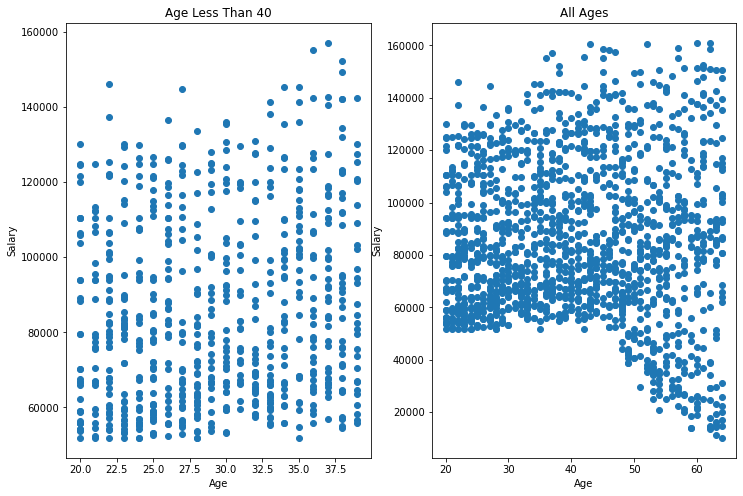

In [46]:
# 13. Filter the all position category data (women only) just that it only contains women that are of 
# age less than 40 then plot the original data with the filtered data next to it

data_40 = data3.copy(deep=True)

columns = ['age', 'salary']

data_under40 = data_under40.loc[data_under40.age < 40]

fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].set_xlabel('Age')
ax[0].set_ylabel('Salary')
ax[0].set_title('Age Less Than 40')

ax[0].scatter(data_under40['age'], data_under40['salary'])

ax[1].set_xlabel('Age')
ax[1].set_ylabel('Salary')
ax[1].set_title('All Ages')

ax[1].scatter(data3['age'], data3['salary'])

plt.show()

In [44]:
# It should improve our training scores because it locks in on what the data is truly
# representative of. In essence, the scores above 40 are so scattered they can be treated as
# outliers

In [37]:
# 14. Use the filtered data that you created in step 13 (women only, position -> all, age < 40), and 
# re-do an automation estimate similar to step 12. Print out the data frame showing automated dataframe. 

report_under40 = training_automation(data_under40)
report_under40

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.002814  6.414812e+08       0.001617  5.225617e+08   
1    0.4   0.6      0.000069  6.146712e+08       0.038571  5.956378e+08   
2    0.6   0.4      0.030844  6.022291e+08       0.017369  6.050317e+08   
3    0.8   0.2      0.047271  5.827652e+08       0.016423  6.094056e+08   

   Model_Var  Model_Error  Avg_Salary  
0   0.304716  3008.345922    78724.58  
1   0.685530 -2573.345812    63189.59  
2   1.489522  -130.196442    68709.19  
3   3.818356  -389.547741    69543.90

--------------------------------------
Model Info
--------------------------------------
age = 70037.35920044813 + 527.2315546502317 salary  + error 

Test r_score is:	 0.030035803388608673
Test rmse is:		 653839446.1252362

Training-Test Split:	 0.9 training 0.1 test

Training r_score is:	 0.015563991621207363
Training rmse is:	 576820478.0491859
Model Variance:		 10.201709611678082

Mean of Test Error:	 -1193.08212140241
Mean of Train Error:	 -7.737923176988723e-12

Average Salary:  70037.36


<function matplotlib.pyplot.show(close=None, block=None)>

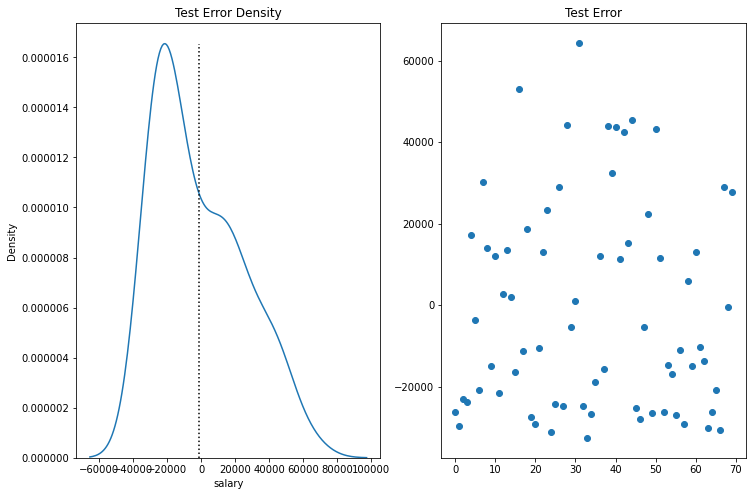

In [73]:
# 15. From step 14’s results pick the best suited train test size and re-estimate the model that gives the following output:

model = LinearRegression()

x_under40 = data_under40[['age']]
y_under40 = data_under40['salary']

x_train, x_test, y_train, y_test = train_test_split(x_under40, y_under40, shuffle = True, train_size = 0.9)

model.fit(x_train, y_train)

predictions_test = model.predict(x_test)

error_test = y_test - predictions_test

r2_test = r2_score(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=True)

predictions_train = model.predict(x_train)
r2_train = r2_score(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

error_train = y_train - predictions_train

model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)

print("--------------------------------------")
print("Model Info")
print("--------------------------------------")

print(f"age = {model.intercept_} + {model.coef_[0]} salary  + error ", end="\n\n")

print('Test r_score is:\t', r2_test)
print('Test rmse is:\t\t', rmse_test)
print()
print(f"Training-Test Split:\t 0.9 training 0.1 test")
print()
print('Training r_score is:\t', r2_train)
print('Training rmse is:\t', rmse_train)
print('Model Variance:\t\t', model_variance)
print()
print('Mean of Test Error:\t', error_test.mean())
print('Mean of Train Error:\t', error_train.mean())

print()

print('Average Salary: ', round(model.intercept_, 2))

fig, ax = plt.subplots(1, 2, figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.title('Test Error Density')

plt.ticklabel_format(style='plain')
my_kde = sns.kdeplot(error_test)
x, y = my_kde.lines[0].get_data()

plt.vlines(error_test.mean(), 0, y.max(), color='Black', ls=':')

plt.subplot(1, 2, 2)
plt.title('Test Error')
plt.scatter(range(error_test.size), error_test)

plt.show

In [ ]:
# I believe that 90% of the sample gives us the best training size because it gives the training
# model the best look at our sample data and allows the training set to expect what it needs to
# expect